In [45]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [52]:
data = eleanor.TargetData(star, height=15, width=15, do_pca=True, do_psf=False)

In [53]:
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400

In [ ]:
type(sc.flux.value)

In [89]:
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], model_name="Gaussian", verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1, likelihood="poisson")

100%|██████████| 900/900 [04:18&lt;00:00,  3.49it/s]


In [69]:
data_m = copy.deepcopy(data)
data_z = copy.deepcopy(data)
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], model_name="MultiGaussian", verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1)

100%|██████████| 900/900 [01:53&lt;00:00,  7.93it/s]


In [ ]:
data_z.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='Zernike', xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1)

array([40513674.46872798, 40716774.71946012, 40086211.4270089 ,
        3891204.12218595,  3027456.29957396,  3005203.09551465,
        3018495.97058836,  3011922.88560122,  2958961.5743038 ,
        2779806.80976819,  2644451.07181307,  2644299.8724664 ,
        2542571.01187446,  2561263.80338949,  2563073.31562799,
        2461421.56204988,  2568158.63523328,  2576058.46944893,
        2574925.18722789,  2555108.77486193,  2566280.52858801,
        2530903.16335861,  2536586.90127287,  2572993.50465295,
        2515466.26992491,  2542509.31981939,  2567095.43678665,
        2547053.12867444,  2551522.44659523,  2565011.07375221,
        2560672.20618136,  2606640.40396156,  2562010.2480846 ,
        2558084.71874216,  2558789.15543539,  2550904.14594541,
        2535698.39228088,  2540105.27123961,  2555081.46995538,
        2538379.7713715 ,  2532659.75262685,  2562449.84759701,
        2562627.75913382,  2560518.40373055,  2569447.20628943,
        2559605.67355193,  2564672.87968

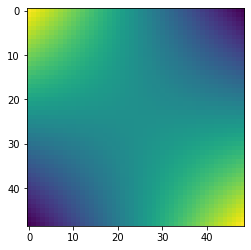

In [76]:
s = 49
zern = eleanor.models.Zernike((s,s),0,0)
x, y = zern.x - np.median(zern.x), zern.y - np.median(zern.y)
plt.imshow(zern.zernike(3).eval(session=sess) * (x ** 2 + y ** 2 < (s//2) ** 2))

[&lt;matplotlib.lines.Line2D at 0x7f800854fd30&gt;]

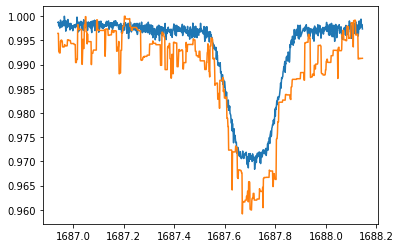

In [90]:
start_real = start+50
time = sc.time[sq][start_real:end]
photometry_flux = sc.to_lightcurve().flux[sq][start_real:end].value
plt.plot(time.value, photometry_flux / np.max(photometry_flux), label='aperture photometry')
psf_flux = np.sum(data.all_psf, axis=1)
plt.plot(time.value, psf_flux[start_real-start:end-start] / np.max(psf_flux[start_real-start:end-start]))

[&lt;matplotlib.lines.Line2D at 0x7f801004ddf0&gt;]

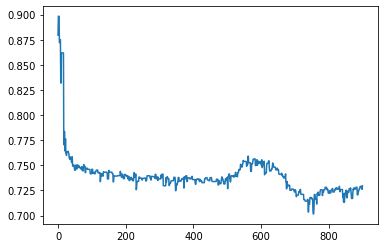

In [91]:
plt.plot(data.psf_params[:,-1])

In [92]:
print(lk.estimate_cdpp(photometry_flux, transit_duration=1))
print(lk.estimate_cdpp(psf_flux, transit_duration=1))

770.4013129712878 ppm
2506.530758769366 ppm
